In [ ]:
import pandas as pd

# Load dataset (replace 'your_dataset.csv' with the actual filename)
df = pd.read_csv('/content/Dataset .csv')

# Display first few rows
df.head()


Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [ ]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
print(df.columns)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()  # Removes extra spaces
df.rename(columns={'Cuisines': 'Cuisine'}, inplace=True)  # Adjust column name if needed


In [ ]:
print(df['Cuisine'].head())


0          French, Japanese, Desserts
1                            Japanese
2    Seafood, Asian, Filipino, Indian
3                     Japanese, Sushi
4                    Japanese, Korean
Name: Cuisine, dtype: object


In [ ]:
df = df.dropna(subset=['Cuisine'])


In [ ]:
print(df['Cuisine'].dtype)


object


In [ ]:
df['Cuisine'] = df['Cuisine'].astype(str)


<ipython-input-10-f96c7c657e7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cuisine'] = df['Cuisine'].astype(str)


In [ ]:
cuisine_counts = df['Cuisine'].value_counts()
print(cuisine_counts.head(3))


Cuisine
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64


In [ ]:
# Count occurrences of each cuisine
cuisine_counts = df['Cuisine'].value_counts()

# Display the top 3 cuisines
top_cuisines = cuisine_counts.head(3)
print(top_cuisines)


Cuisine
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64


In [ ]:
from collections import Counter

# Split cuisines and count individually
cuisine_list = df['Cuisine'].dropna().str.split(', ').explode()
cuisine_counts = cuisine_list.value_counts()

# Display the top 3 cuisines
top_cuisines = cuisine_counts.head(3)
print(top_cuisines)


Cuisine
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


In [ ]:
# Total number of restaurants
total_restaurants = len(df)

# Calculate percentage for top 3 cuisines
top_cuisine_percentages = (top_cuisines / total_restaurants) * 100

# Display results
print(top_cuisine_percentages)


Cuisine
North Indian    41.500734
Chinese         28.662754
Fast Food       20.813247
Name: count, dtype: float64


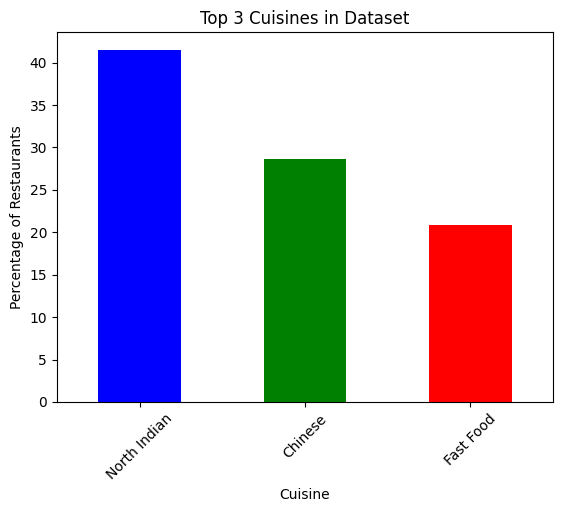

In [ ]:
import matplotlib.pyplot as plt

# Plot top cuisines
top_cuisine_percentages.plot(kind='bar', color=['blue', 'green', 'red'])

plt.xlabel('Cuisine')
plt.ylabel('Percentage of Restaurants')
plt.title('Top 3 Cuisines in Dataset')
plt.xticks(rotation=45)
plt.show()
